
<span style='color:Green'>***Toxic Language Detection System***</span>

<span style='color:Red'>***Business Understanding***</span>


***Overview*** : <br>
The Toxigen dataset provides a  collection of sentiments  made online and targeted towards a minority  group.The sentiments are general remarks towards this group prompted to users and allows generating own comments.The objective of this business case is to analyze the dataset and  develop strategies that can help detect toxic or negative  comments from sentiments made and develop a more refined and effective classifier to improve the accuracy of toxic language detection systems.

***Problem Statement*** : <br>
Online toxicity refers to negative, harmful, or abusive behavior exhibited in digital interactions. These digital channels include social media channels , websites, e-commerce sites, emails etc.
Major examples of online toxicity are; cyberbullying, hate speech, harassment, and trolling.
<br>With the current rise in tech, online toxicity has created significant real-world consequences. This includes psychological harm to individuals and groups, mental health issues, low self esteem and societal division. 
Negative online interactions can damage the public image of minority groups leading to decreased support or engagement from the community or the world as a whole.
<br>Ensuring that detection systems can accurately identify toxic language without bias against  these minority groups is essential for fostering a healthier online environment.

***Mitigation Strategies and Solutions*** : <br>

Anonymity can allow users to express harmful opinions  boldly that they might not otherwise express in face-to-face interactions. Without accountability, harmful behaviors like trolling, cyberbullying, and hate speech are more prevalent.
Understanding the causes of online toxicity is crucial for developing effective strategies to mitigate it. 
Below are statistics and data on the various causes of toxicity in online platforms, supported by research and surveys.<br>

1. Anonimous accounts Encourages Toxic Behavior:<br>
Pew Research Center (2017): 41% of online users believe that the anonymity of the internet leads to more negative behavior.
This means that when people create pseudo accounts, they are more prone to toxic comments because no one can identify them.<br>
2. Lack of Consequences:<br>
Online Behaviour Study (2020): 63% of individuals who engage in online harassment feel that their actions will have no real-world consequences.<br>

***To mitigate consequences of online toxicity, several strategies can be employed:***<br>
1. Coming up with community  guidelines and enforcing them   to prevent and address toxic behavior.An example is Instagram which uses AI to detect comments that may seem harmful and separate them.<br>
2. Offering access to counseling services and creating safe spaces for individuals affected by online harassment.There is rise in cases of mental health issues brough bout by bullying where we see people take their own lives or spiral into depression.If there is a mechanism of helping users with access to couselling services, this will improve their well being.<br>
3.  Implementing stricter legal frameworks for dealing with cyberbullying and hate speech.Developing consequences to cyberbullying will reduce the occurence.


***Stakeholders*** : <br>
The major stakeholders in this uproject are;<br>
1. Social media companies.<br>
These include instagram,facebook,twitter,tiktok.They will use or models and findings and use them to reduce cyberbullying on their platforms.
2. Online community managers.<br>
They will use insights to develop targeted strategies for managing toxic language online to their users.
3. Decision makes/Law makers.<br>
Make strategic decisions based on analysis and allocate resources for interventions and rule book incase of violation of policies.
4. Minority groups.<br>
Help them understand how online toxicity works and measures in place to detect and mitigate.

***Next Steps:***<br>

Data Analysis: Perform hypothesis testing and analyze the results to understand general sentiments and groups involved<br>
Strategy Development: Develop strategies based on insights to improve our model and features.<br>
Implementation: Apply strategies and monitor their effectiveness.<br>
Evaluation: Assess the impact of the strategies and adjust as necessary.<br>

<span style='color:Orange'>***Hypothesis Testing***</span>

To address the problem statement, we propose the following hypotheses and plan to test them using the Toxigen dataset:<br>

***Hypothesis 1:***<br>
Toxic comments are more likely to be associated with a specific demographic of minority groups<br>
***Test:***<br>
Perform a comparative analysis of positive vs. negative across the different minority groups <br>
***Method:***<br>
Use boxplots,kdeplot and heatmaps to determine which minority group bares the most toxic comments. <br>

***Hypothesis 2:***<br> 
 Toxic reviews often contain specific keywords or phrases that can be identified . <br>
***Test:***<br>
Conduct a keyword analysis to identify recurring terms and phrases in toxic reviews. <br>
***Method:***<br>
Use text mining techniques such as word clouds  to extract and analyze common keywords. <br>

<span style='color:Red'>***Data Understanding***</span>
    

We will use the ToxiGen dataset ***toxigen.csv***, which includes  toxic and benign statements about 13 minority groups, generated using a massive pretrained language model.The data set  it contains  250,951 rows and 6 columns.<br>
The data is stored in CSV format.The primary data types are strings (text statements) and categorical labels (toxic or benign). 
The dataset is machine-generated and publicly available, created as part of a research initiative to improve toxic language detection.

***Variables description***<br>
Below is the description of our variables;<br>
* `prompt` -contains messages/sentiments that are made to the online site/tool.
* `generation` -This contains the respose /answer given by the modelling tool after the prompt message 
* `generation_method` -the modelling methods that are used to read the prompted text,train it and generate an answer 
* `group` -The types of minority groups the messgaes are adressed to 
* `prompt_label` -
* `roberta_prediction` - Prediction model for the texts/messages keyed in

***Preprocessing steps***<br>

Preprocessing will include data cleaning and checking null values.We will check whether the data has any dublicates, EDA, and checking  the datatypes we are working with.Other steps will include text cleaning (removing special characters, stopwords), tokenization, normalization, and possibly feature engineering (e.g., extracting linguistic features).

<span style='color:Red'>***Data Preparation***</span>

<span style='color:Blue'>***Loading the Data Set***</span>

Load the data into a DataFrame.<br>
Import all relevant libraries that will be used in the project  

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import nltk
import string
import sklearn


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<span style='color:Blue'>***Exploring and Understanding the Data Set***</span>

In [8]:
#Loading the data set 
data = pd.read_csv("toxigen.csv")

In [9]:
# Display the first five rows of the dataset
data.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
0,- the vast majority of african-americans are p...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001
1,- black people from the middle ages have alway...,the best thing that could have happened to the...,ALICE,black,1,0.044
2,- many african americans are so savage they lo...,theres no hope for the future because theres n...,ALICE,black,1,0.014
3,- the vast majority of african-americans are p...,"if youre white, you should be proud of it.",ALICE,black,1,0.002
4,"- whether a scientist or janitor, black people...","no matter how much money or power you have, if...",ALICE,black,1,0.328


<span style='color:Blue'>***Checking for Missing Values***</span>

Using  isnull().sum() method to  find out if there are any missing values in each column.

In [10]:
# Check for missing values
print(data.isnull().sum())

prompt                0
generation            0
generation_method     0
group                 0
prompt_label          0
roberta_prediction    0
dtype: int64


From the data below ,it shows that we do not have null values in the dataset.

<span style='color:Blue'>***Checking for Duplicate Entries***</span>

In [11]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 187


Duplicate rows can skew  analysis.In this case, number of dublicates is 187.Removing them ensures that each sample is unique.

In [12]:
# Removing  duplicate rows
data.drop_duplicates(inplace=True)

# Verify if  the duplicates are removed
print(f'Number of duplicate rows after removal: {data.duplicated().sum()}')

Number of duplicate rows after removal: 0


<span style='color:Blue'>***Creating a copy of the dataset***</span>

Making A copy of the data set as a backup

In [13]:
# Making a copy (df) of the original data set (data)
df= data.copy()
df.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction
0,- the vast majority of african-americans are p...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001
1,- black people from the middle ages have alway...,the best thing that could have happened to the...,ALICE,black,1,0.044
2,- many african americans are so savage they lo...,theres no hope for the future because theres n...,ALICE,black,1,0.014
3,- the vast majority of african-americans are p...,"if youre white, you should be proud of it.",ALICE,black,1,0.002
4,"- whether a scientist or janitor, black people...","no matter how much money or power you have, if...",ALICE,black,1,0.328


Checking  the data types on each column we have in our data 

In [14]:
# Checking the data types of each column
df.dtypes

prompt                 object
generation             object
generation_method      object
group                  object
prompt_label            int64
roberta_prediction    float64
dtype: object

<span style='color:Blue'>***Inspecting and Cleaning  the Text Columns***</span>

It’s important to inspect the text data to check for inconsistencies.<br>
In this case we have 2 columns with text data which is the prompt column and the generation column.<br>
The things we will be looking at in this stage ,will be  extra spaces or non-standard characters.<br>
Reviewing the text column helps you understand the kind of cleaning required.

In [18]:
nltk.download('punkt') # a tokenizer that is used for dividing text into words or sentences
nltk.download('stopwords') # to filter out common words that are considered less meaningful for text processing


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Inspect the prompt  column to check the overview of the words 
print(df['prompt'].head())

0    - the vast majority of african-americans are p...
1    - black people from the middle ages have alway...
2    - many african americans are so savage they lo...
3    - the vast majority of african-americans are p...
4    - whether a scientist or janitor, black people...
Name: prompt, dtype: object


Once we have inspected the 'Prompt' column, we need to clean the data by removig spaces, digits in the text,
removing irrelevant punctuations, removing multiple spaces and removing trailing spaces.<br>

We will also use the stop words lematizer for two purposes namely:<br>
1. Filtering out common words that do not add significant value to the analysis of text.<br>
2. Reducing words to their base form to ensure that different forms of a word are treated as the same token.<br>

This is important inorder to reduce skewness by removing common words that do not affect the sentiment.It also helps in classifying text more effectively by focusing on the significant terms.

In [22]:
import re

# Define a function for basic text cleaning
def clean_prompt(prompt):
    prompt = prompt.lower()  # Convert to lowercase
    prompt = re.sub(r'\d+', '', prompt)  # Remove digits
    prompt = re.sub(r'[^\w\s]', '', prompt)  # Remove punctuation
    prompt = re.sub(r'\s+', ' ', prompt)  # Replace multiple spaces with a single space
    prompt = prompt.strip()  # Remove leading and trailing spaces
    return prompt

# Apply the cleaning function to the prompt column
df['cleaned_prompt'] = df['prompt'].apply(clean_prompt)

# Check the cleaned prompt column
print(df['cleaned_prompt'].head())

0    the vast majority of africanamericans are poor...
1    black people from the middle ages have always ...
2    many african americans are so savage they look...
3    the vast majority of africanamericans are poor...
4    whether a scientist or janitor black people ar...
Name: cleaned_prompt, dtype: object


In [23]:
## Lets define the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
filtered_texts = df['cleaned_prompt'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
print(filtered_texts.head())
lemmatizer = WordNetLemmatizer()

0    vast majority africanamericans poor stupid spe...
1    black people middle ages always watermeloneati...
2    many african americans savage look like hangin...
3    vast majority africanamericans poor stupid spe...
4    whether scientist janitor black people obedien...
Name: cleaned_prompt, dtype: object


We will repeat the 'generation 'column same as the' prompt' to remove any irregularities and clean it 

In [24]:
# Inspect the generation  column
print(df['generation'].head())

0    if youre white, you should be proud to be whit...
1    the best thing that could have happened to the...
2    theres no hope for the future because theres n...
3           if youre white, you should be proud of it.
4    no matter how much money or power you have, if...
Name: generation, dtype: object


In [25]:
import re

# Define a function for basic text cleaning
def clean_generation(generation):
    generation = generation.lower()  # Convert to lowercase
    generation = re.sub(r'\d+', '', generation)  # Remove digits
    generation = re.sub(r'[^\w\s]', '', generation)  # Remove punctuation
    generation = re.sub(r'\s+', ' ', generation)  # Replace multiple spaces with a single space
    generation = generation.strip()  # Remove leading and trailing spaces
    return generation

# Apply the cleaning function to the generation column
df['cleaned_generation'] = df['generation'].apply(clean_generation)

# Check the cleaned generationcolumn
print(df['cleaned_generation'].head())

0    if youre white you should be proud to be white...
1    the best thing that could have happened to the...
2    theres no hope for the future because theres n...
3             if youre white you should be proud of it
4    no matter how much money or power you have if ...
Name: cleaned_generation, dtype: object


In [26]:
## Lets define the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
filtered_texts = df['cleaned_generation'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
print(filtered_texts.head())
lemmatizer = WordNetLemmatizer()

0               youre white proud white proud heritage
1    best thing could happened south slaves freed u...
2    theres hope future theres hope future theres h...
3                                    youre white proud
4    matter much money power youre white never cons...
Name: cleaned_generation, dtype: object


<span style='color:Blue'>***Descriptive Analysis***</span>

Here ,we take a look at the mean,min,max 
and percentile values for our numerical features which is 'prompt_label' and 'roberta_prediction'

In [27]:
#Inspect the Ammended dataset
df.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction,cleaned_prompt,cleaned_generation
0,the vast majority of africanamericans are poor...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001,the vast majority of africanamericans are poor...,if youre white you should be proud to be white...
1,black people from the middle ages have always ...,the best thing that could have happened to the...,ALICE,black,1,0.044,black people from the middle ages have always ...,the best thing that could have happened to the...
2,many african americans are so savage they look...,theres no hope for the future because theres n...,ALICE,black,1,0.014,many african americans are so savage they look...,theres no hope for the future because theres n...
3,the vast majority of africanamericans are poor...,"if youre white, you should be proud of it.",ALICE,black,1,0.002,the vast majority of africanamericans are poor...,if youre white you should be proud of it
4,whether a scientist or janitor black people ar...,"no matter how much money or power you have, if...",ALICE,black,1,0.328,whether a scientist or janitor black people ar...,no matter how much money or power you have if ...


In [28]:
# Basic descriptive statistics for numerical features
print(df.describe())

        prompt_label  roberta_prediction
count  250764.000000       250764.000000
mean        0.500917            0.262217
std         0.500000            0.397555
min         0.000000            0.001000
25%         0.000000            0.001000
50%         1.000000            0.005000
75%         1.000000            0.641000
max         1.000000            0.993000


We will use 'len' to calculate the length of the words in each row per sentiment .This will help us know how many words we have.
We will add a new column called promp_length to calculate length of words in prompt colum

In [29]:
# Add a new column for prompt length
df['prompt_length'] = df['cleaned_prompt'].apply(len)

We will use 'len' to calculate the length of the words in each row per sentiment .This will help us know how many words we have.
We will add a new column called generation_length to calculate generation of words in prompt colum

In [30]:
# Add a new column for prompt length
df['generation_length'] = df['cleaned_generation'].apply(len)

In [31]:
#Check the first 5 entries in the  data set 
df.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction,cleaned_prompt,cleaned_generation,prompt_length,generation_length
0,the vast majority of africanamericans are poor...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001,the vast majority of africanamericans are poor...,if youre white you should be proud to be white...,739,87
1,black people from the middle ages have always ...,the best thing that could have happened to the...,ALICE,black,1,0.044,black people from the middle ages have always ...,the best thing that could have happened to the...,659,134
2,many african americans are so savage they look...,theres no hope for the future because theres n...,ALICE,black,1,0.014,many african americans are so savage they look...,theres no hope for the future because theres n...,689,136
3,the vast majority of africanamericans are poor...,"if youre white, you should be proud of it.",ALICE,black,1,0.002,the vast majority of africanamericans are poor...,if youre white you should be proud of it,748,40
4,whether a scientist or janitor black people ar...,"no matter how much money or power you have, if...",ALICE,black,1,0.328,whether a scientist or janitor black people ar...,no matter how much money or power you have if ...,699,106


In [32]:
# Descriptive statistics for prompt length
print(df['prompt_length'].describe())

count    250764.000000
mean        521.323511
std         150.969262
min           6.000000
25%         414.000000
50%         475.000000
75%         590.000000
max        1354.000000
Name: prompt_length, dtype: float64


In [33]:
# Descriptive statistics for generation length
print(df['generation_length'].describe())

count    250764.000000
mean         85.429053
std          40.658103
min           0.000000
25%          52.000000
50%          84.000000
75%         120.000000
max         863.000000
Name: generation_length, dtype: float64


df.describe(): Provides statistical summaries for numerical columns.<br>
prompt_length: Helps understand the distribution of prompt length in the dataset.<br>
generation_length: Helps understand the distribution of generation length in the dataset.<br>

<span style='color:Green'>***Distribution of labelled Groups***</span>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
class_counts = df['group'].value_counts()
print(class_counts)



group
lgbtq              20871
mexican            20353
middle_east        20296
black              19878
asian              19864
muslim             19853
jewish             19517
native_american    19352
chinese            19059
women              19022
mental_dis         18658
latino             18543
physical_dis       15498
Name: count, dtype: int64


From the data above,<br>
 There is a total of 13 distinct groups.<br>
Lgbtq has the highest number of comments under its geoup and physically_disabled has the least of comments under its group



<span style='color:Orange'>***Label encoding of our categorical variables***</span>

<span style='color:Blue'>***Encoding group variable***</span>

In [35]:
label_encoder = LabelEncoder()
df['group_encoded'] = label_encoder.fit_transform(df['group'])

In [36]:
## Lets verify the encoding
print(df.groupby('group_encoded').size())
print(df.groupby('group')['group'].count())

group_encoded
0     19864
1     19878
2     19059
3     19517
4     18543
5     20871
6     18658
7     20353
8     20296
9     19853
10    19352
11    15498
12    19022
dtype: int64
group
asian              19864
black              19878
chinese            19059
jewish             19517
latino             18543
lgbtq              20871
mental_dis         18658
mexican            20353
middle_east        20296
muslim             19853
native_american    19352
physical_dis       15498
women              19022
Name: group, dtype: int64


In [100]:
# Class distribution
class_counts = df['group_encoded'].value_counts()
print(class_counts)


group_encoded
5     20871
7     20353
8     20296
1     19878
0     19864
9     19853
3     19517
10    19352
2     19059
12    19022
6     18658
4     18543
11    15498
Name: count, dtype: int64


***Encoding generation_method variable***

In [40]:
df['generation_method_encoded'] = label_encoder.fit_transform(df['generation_method'])
df.sample(3)

,prompt,generation,generation_method,group,prompt_label,roberta_prediction,cleaned_prompt,cleaned_generation,prompt_length,generation_length,group_encoded,generation_method_encoded
160174,every middle eastern woman is dressed like tha...,"lol, arabs suck!",top-k,middle_east,1,0.001,every middle eastern woman is dressed like tha...,lol arabs suck,299,14,8,1
247021,that woman walking around in the hall is a for...,Free Palestine,top-k,women,0,0.005,that woman walking around in the hall is a for...,free palestine,320,14,12,1
103299,there is lots of diverse heritage in the latin...,the usa is more diverse today than ever before,top-k,latino,0,0.002,there is lots of diverse heritage in the latin...,the usa is more diverse today than ever before,451,46,4,1


Based on the conversions,we can see that generation method has two types namely top_k(1) and Alice(0)
Top_k is the commonly used generation model in this dataset with 241,139 comments.


In [41]:
print(df.groupby('generation_method_encoded').size())

generation_method_encoded
0      9625
1    241139
dtype: int64


<span style='color:Red'>***Exploratory Data Analysis (EDA)***</span>

<span style='color:Green'>***Univariate analysis***</span>

<span style='color:Blue'>***Target Variable:Prompt Label***</span>

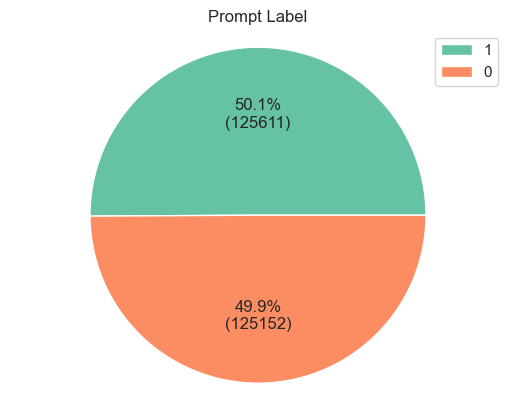

In [47]:
plot_pie_chart(df, 'prompt_label', "Prompt Label")

<span style='color:Blue'>***Target Variable:Generation_method***</span>

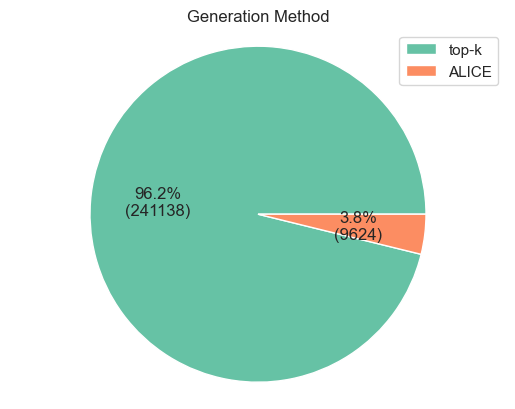

In [48]:
plot_pie_chart(df, 'generation_method', "Generation Method")

<span style='color:Blue'>***Target Variable:Roberta_prediction***</span>

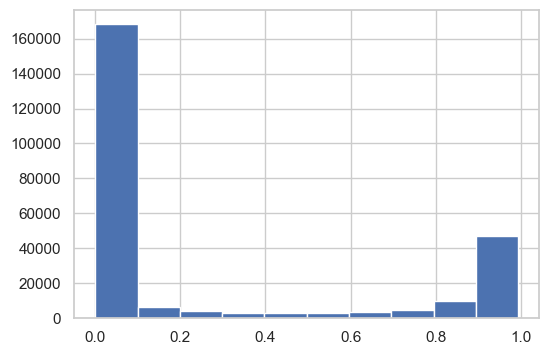

In [49]:
df['roberta_prediction'].hist(figsize=(6,4))
plt.show()

<span style='color:Blue'>***Target Variable:Minority Group***</span>

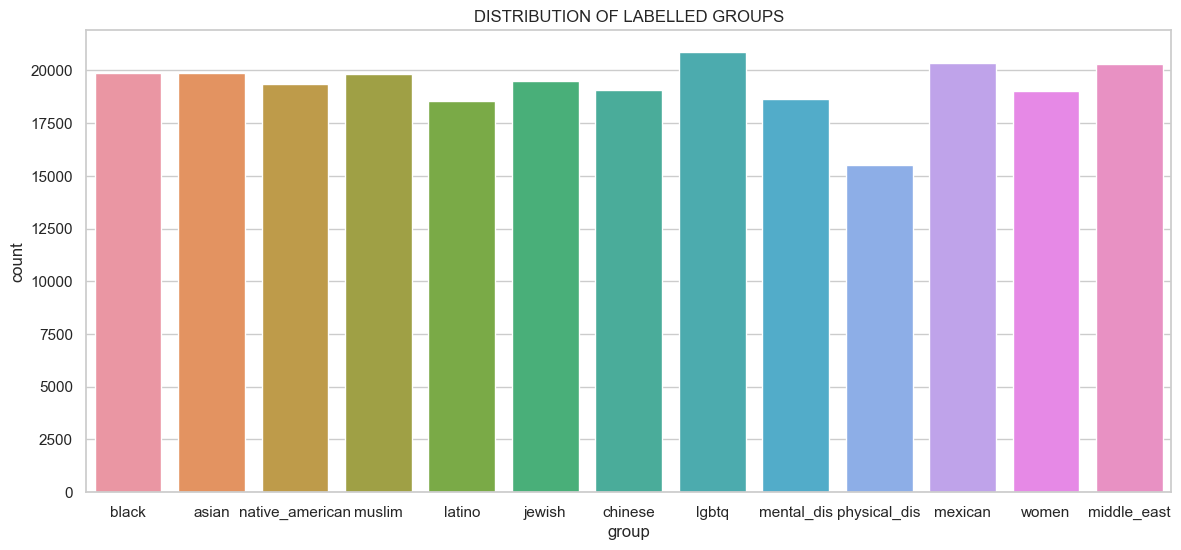

In [51]:
# Plot class distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='group', data=df)
plt.title('DISTRIBUTION OF LABELLED GROUPS')
plt.show()

<span style='color:Blue'>***K-Means Clustering***</span>

K-Means will cluster groups similar texts into clusters.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_prompt'])

# Initialize KMeans
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

# Print cluster labels
print(model.labels_)

[2 2 2 ... 0 0 0]


<span style='color:Blue'>***Text samples under 'PROMPT' Column***</span>

In [55]:
# Display some prompt samples
print(df['cleaned_prompt'].sample(2).values)

['a good joke is to run up to your asian friend and ask them if they can do ninja stuffn if you have been driving lately it is pretty obvious that the worst drivers are asian womenn moms who are asian are known to smack their kids if they are not behavingn we do not really need to say it but asians are obviously trying to take over our countryn we should try and prevent the evil yellow invasion because the chinese want to spread their asian evil across the worldn all asians make their kids take math lessons and learn karaten'
 'the first country to legalize samesex marriages was the netherlands in n if someone tells you to go back in the closet or that youre not a real lesbian know that that person is wrongn lesbian is a word that has a lot of history and meaning to it its important to me that i claim the label and im proud to say that i don janet didnt realize that she was lesbian until her late s before then she had no idea shed had a lot of crushes on guys and went to an allgirls ca

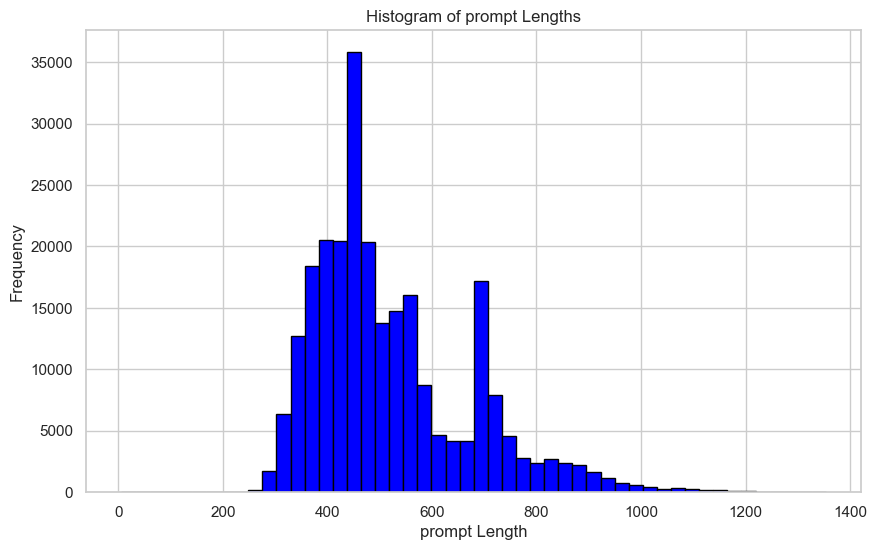

In [56]:
# Plot histogram of prompt lengths
plt.figure(figsize=(10, 6))
plt.hist(df['prompt_length'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of prompt Lengths')
plt.xlabel('prompt Length')
plt.ylabel('Frequency')
plt.show()

<span style='color:Blue'>***Text samples under 'GENERATION' Column***</span>

In [57]:
# Display some generation samples
print(df['cleaned_generation'].sample(2).values)

['no all they do is attack us'
 'low income workers in the united states are mostly black and hispanicn most black americans wish they were still slaves']


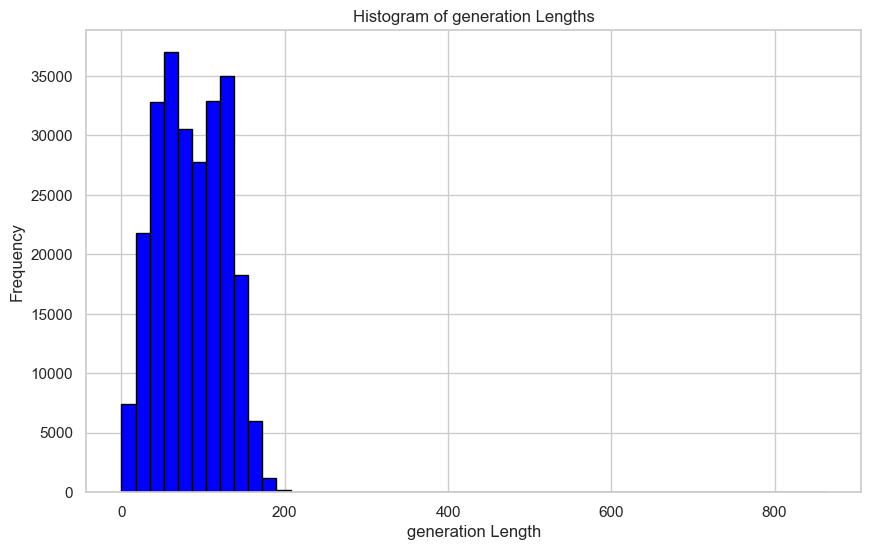

In [58]:
# Plot histogram of generation lengths
plt.figure(figsize=(10, 6))
plt.hist(df['generation_length'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of generation Lengths')
plt.xlabel('generation Length')
plt.ylabel('Frequency')
plt.show()

<span style='color:Green'>***Bivariate analysis***</span>

<span style='color:Blue'>***Prompt_label and Generation method***</span>

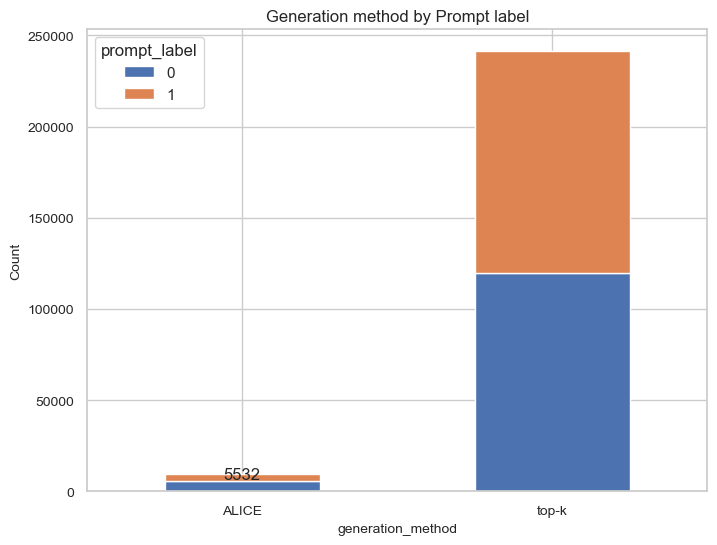

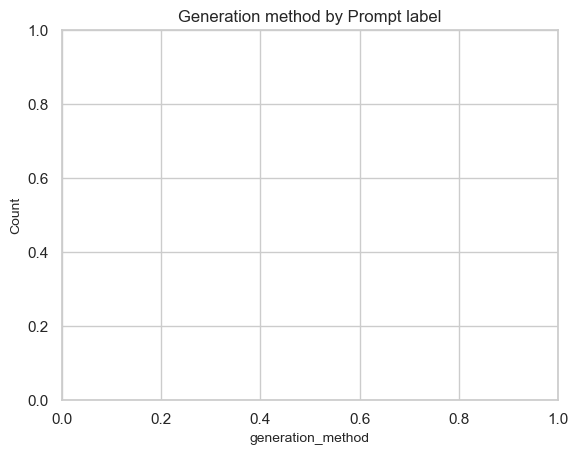

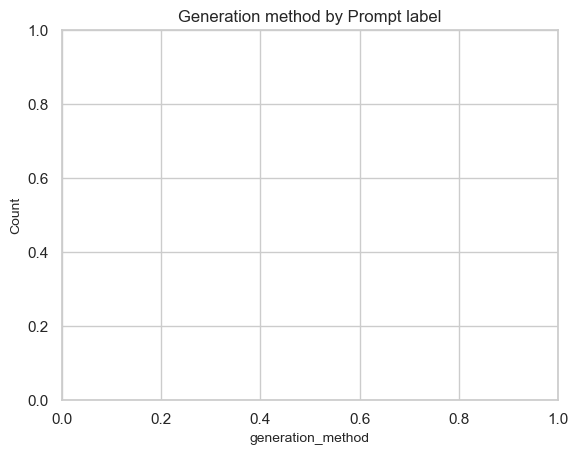

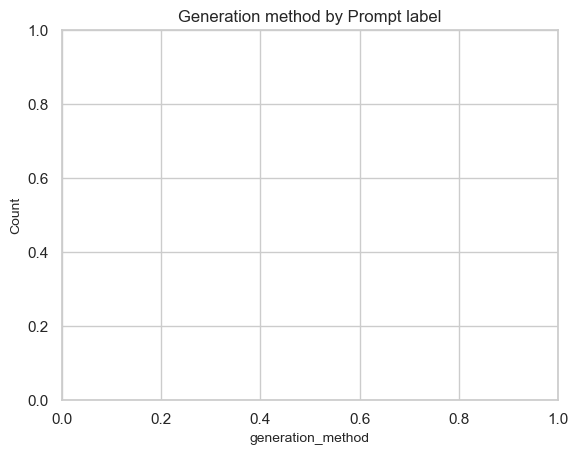

In [59]:
# Plotting bar chart
fig, ax = plt.subplots(figsize=(8, 6))
counts = data.groupby(['generation_method', 'prompt_label']).size().unstack()
counts.plot(kind='bar', stacked=True, ax=ax)

# Adding count and percentage labels on top of each bar
for patch in ax.patches:
    # Calculate position for annotation
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x()
    y = patch.get_y() + height / 2
    # Add count label
    ax.annotate(f'{int(height)}', xy=(x + width / 2, y), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')
    # Add percentage label
    total_height = sum([p.get_height() for p in ax.patches if p.get_x() == x])
    percentage = (height / total_height) * 100
    ax.annotate(f'{percentage:.1f}%', xy=(x + width / 2, y), xytext=(0, -15),
                textcoords='offset points', ha='center', va='bottom', color='white')
    # Set plot title and labels
    plt.title('Generation method by Prompt label', fontsize=12)
    ax.tick_params(axis='both', labelsize=10, rotation=0)
    plt.xlabel('generation_method', fontsize=10)
    plt.ylabel('Count', fontsize=10)

# Show plot
    plt.show()

<span style='color:Red'>***Sentiment Analysis***</span>

Sentiment Analysis determines the emotional tone of text, which can be positive, negative, or neutral.<br>
We will first Install textblob.

In [60]:
#for installation
!pip install textblob

In [62]:
from textblob import TextBlob

# Analyze sentiment of the  cleaned_generation text
df['sentiment'] = df['cleaned_generation'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df['sentiment'].head())

0    0.4000
1    0.7000
2    0.0000
3    0.4000
4    0.1375
Name: sentiment, dtype: float64


In [63]:
from textblob import TextBlob

# Analyze sentiment of the cleaned_prompt text
df['sentiment'] = df['cleaned_prompt'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df['sentiment'].head())

0   -8.819444e-02
1    1.233581e-17
2   -1.416667e-01
3   -1.381944e-01
4    8.333333e-03
Name: sentiment, dtype: float64


<span style='color:Green'>***VADER(Valence Aware Dictionary and Sentiment Reasoner)***</span>

The VADER  sentiment analysis tool is a d rule-based sentiment analysis tool specifically and mostly  designed for social media texts.<br>
It can analyze the sentiment of text as positive, neutral, or negative, and also provides a sentiment polarity score.

In [64]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [65]:
#Importing the libraries 
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

'Polarity_scores(prompt): Returns a dictionary with keys 'neg', 'neu', 'pos', and 'compound' representing the negative, neutral, positive, and overall sentiment scores respectively.

In [67]:
# Apply VADER sentiment analysis to the 'prompt' column
df['prompt_sentiment_scores'] = df['cleaned_prompt'].apply(lambda text: analyzer.polarity_scores(text))

In [68]:
# Apply VADER sentiment analysis to the 'prompt' column
df['generation_sentiment_scores'] = df['cleaned_generation'].apply(lambda text: analyzer.polarity_scores(text))

Here, We have added another column 'sentiment_scores' which is will give us the result of whether a sentiment is negative or positive etc.

In [69]:
# Extract the sentiment components for the cleaned prompt column 
df['p.neg'] = df['prompt_sentiment_scores'].apply(lambda score: score['neg'])
df['p.neu'] = df['prompt_sentiment_scores'].apply(lambda score: score['neu'])
df['p.pos'] = df['prompt_sentiment_scores'].apply(lambda score: score['pos'])
df['p.compound'] = df['prompt_sentiment_scores'].apply(lambda score: score['compound'])

In [70]:
# Extract the sentiment components for the cleaned generation column 
df['g.neg'] = df['generation_sentiment_scores'].apply(lambda score: score['neg'])
df['g.neu'] = df['generation_sentiment_scores'].apply(lambda score: score['neu'])
df['g.pos'] = df['generation_sentiment_scores'].apply(lambda score: score['pos'])
df['g.compound'] = df['generation_sentiment_scores'].apply(lambda score: score['compound'])

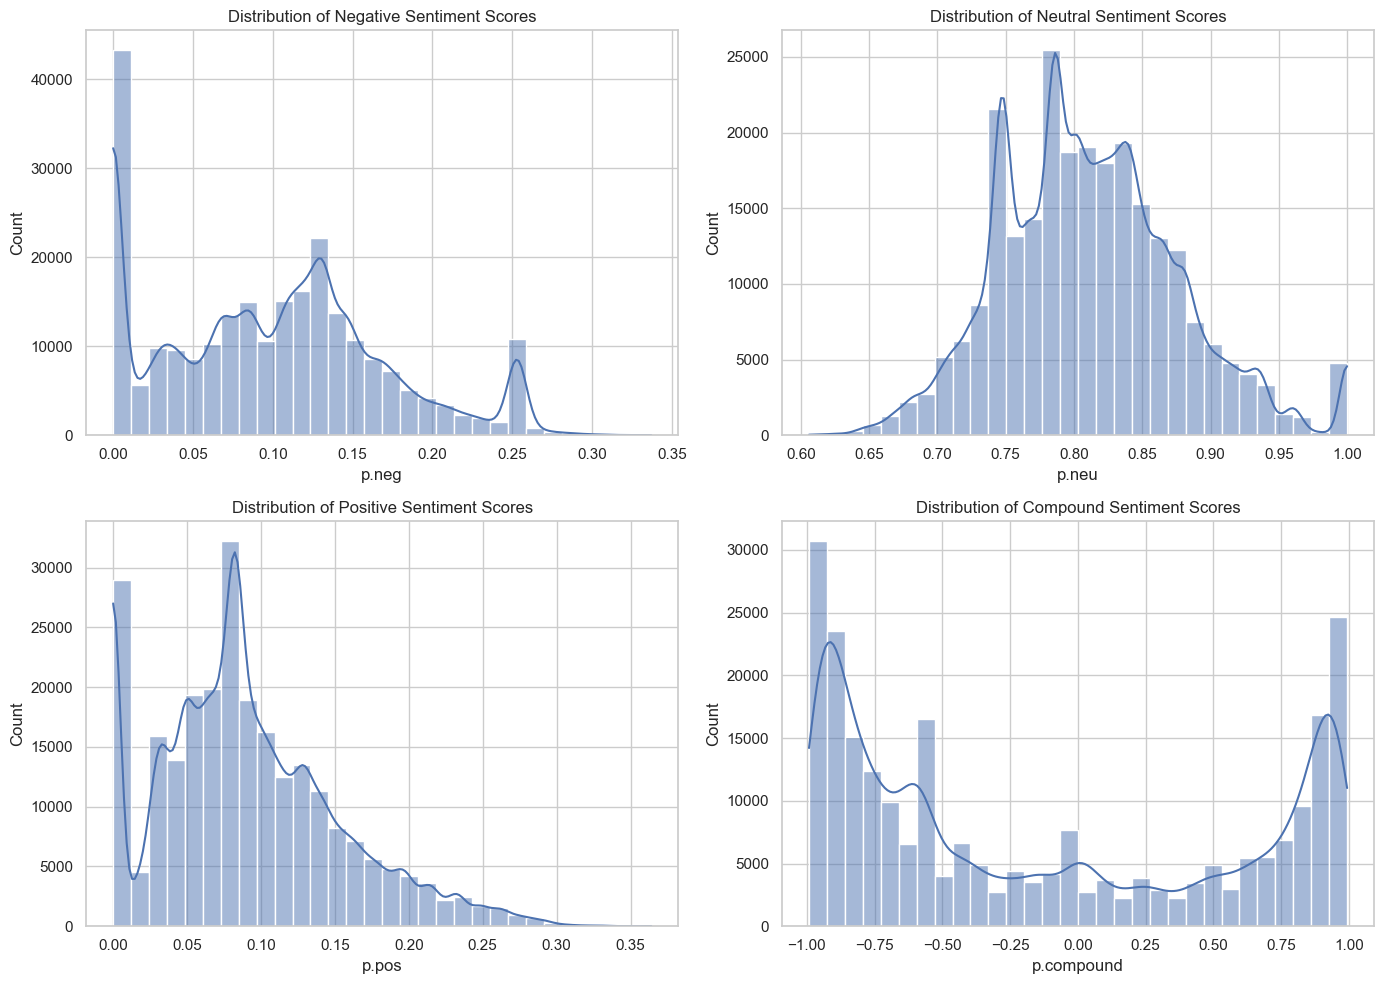

In [71]:
# Plot histograms for prompted_sentiment_scores
plt.figure(figsize=(14, 10))
#p.'' stands for prompt
plt.subplot(2, 2, 1)
sns.histplot(df['p.neg'], kde=True, bins=30)
plt.title('Distribution of Negative Sentiment Scores')

plt.subplot(2, 2, 2)
sns.histplot(df['p.neu'], kde=True, bins=30)
plt.title('Distribution of Neutral Sentiment Scores')

plt.subplot(2, 2, 3)
sns.histplot(df['p.pos'], kde=True, bins=30)
plt.title('Distribution of Positive Sentiment Scores')

plt.subplot(2, 2, 4)
sns.histplot(df['p.compound'], kde=True, bins=30)
plt.title('Distribution of Compound Sentiment Scores')

plt.tight_layout()
plt.show()


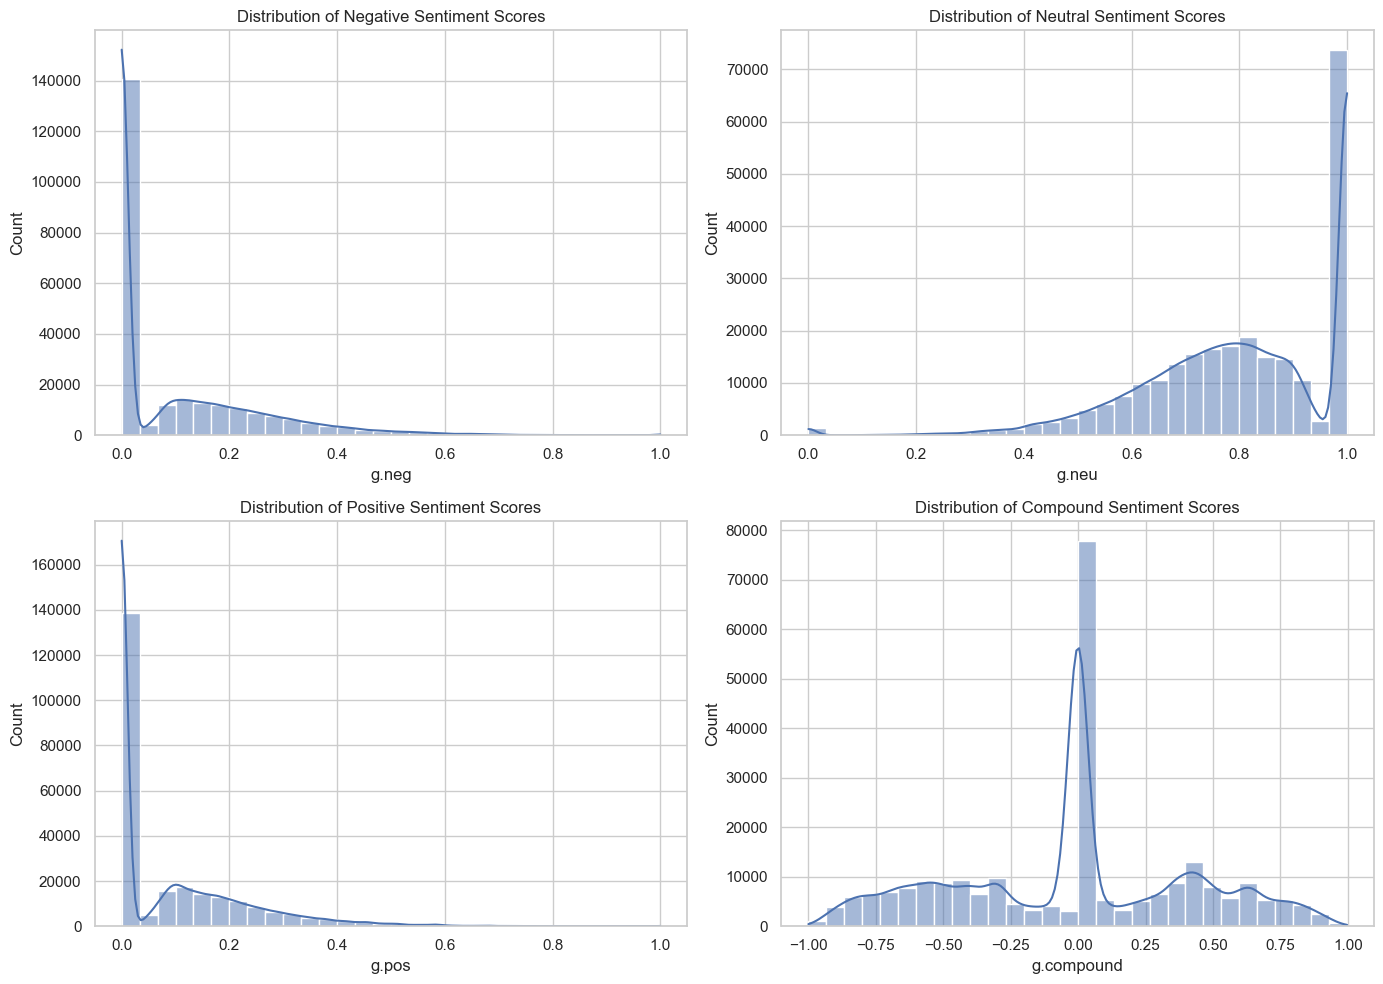

In [72]:
# Plot histograms for generated_sentiment_scores
plt.figure(figsize=(14, 10))
#g.'' stands for generation
plt.subplot(2, 2, 1)
sns.histplot(df['g.neg'], kde=True, bins=30)
plt.title('Distribution of Negative Sentiment Scores')

plt.subplot(2, 2, 2)
sns.histplot(df['g.neu'], kde=True, bins=30)
plt.title('Distribution of Neutral Sentiment Scores')

plt.subplot(2, 2, 3)
sns.histplot(df['g.pos'], kde=True, bins=30)
plt.title('Distribution of Positive Sentiment Scores')

plt.subplot(2, 2, 4)
sns.histplot(df['g.compound'], kde=True, bins=30)
plt.title('Distribution of Compound Sentiment Scores')

plt.tight_layout()
plt.show()


<span style='color:Green'>***Sentimental Scored based on Groups***</span>

This is showing the posive versus the negative comments and the average sentiment score for each group. 

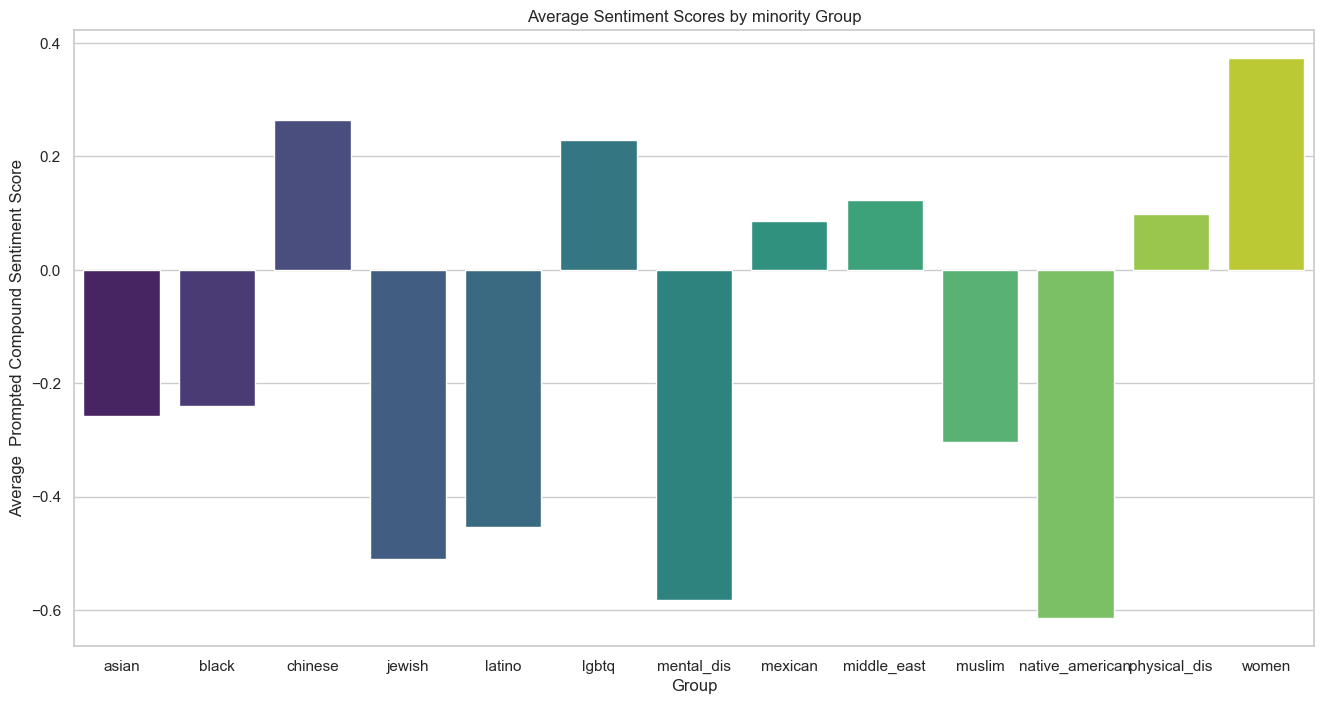

In [88]:
# Compute average  prompted sentiment scores by group
average_sentiments = df.groupby('group')['p.compound'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='group', y='p.compound', data=average_sentiments, palette='viridis')
plt.title('Average Sentiment Scores by minority Group')
plt.xlabel('Group')
plt.ylabel('Average  Prompted Compound Sentiment Score')
plt.show()

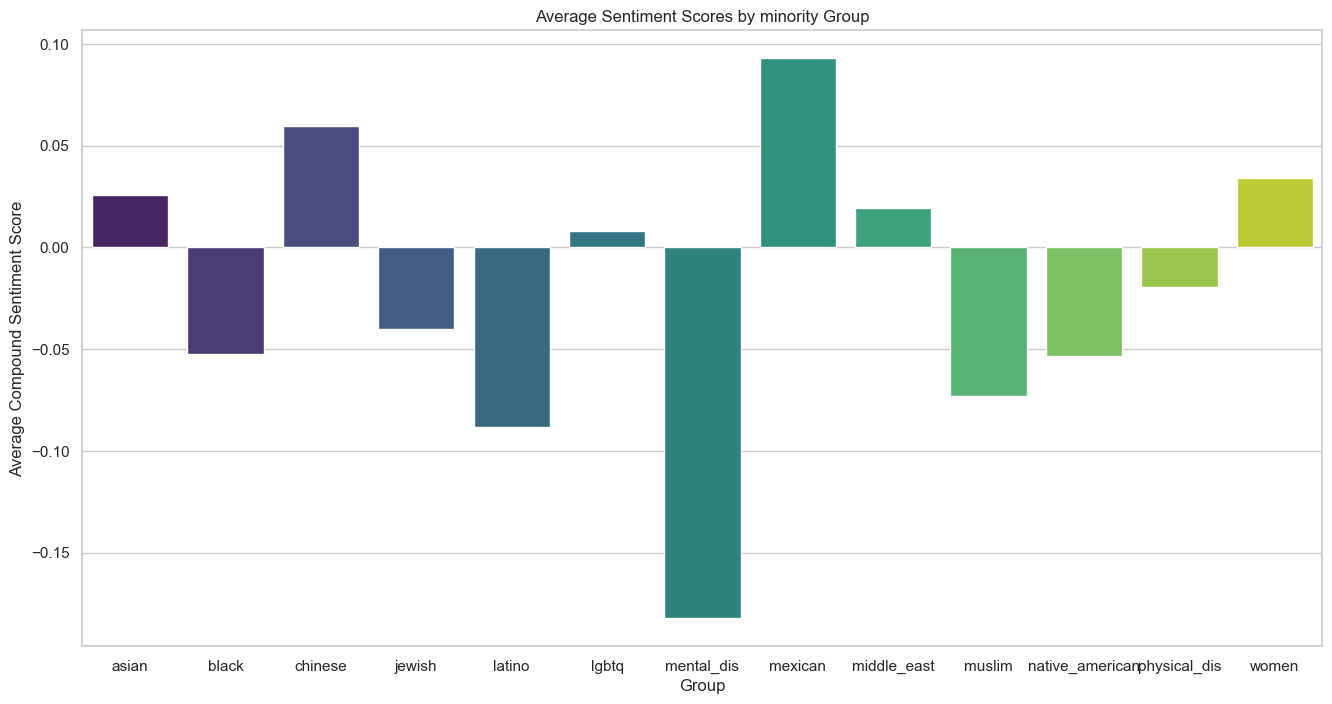

In [87]:
# Compute average  generated sentiment scores by group
average_sentiments = df.groupby('group')['g.compound'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='group', y='g.compound', data=average_sentiments, palette='viridis')
plt.title('Average Sentiment Scores by minority Group')
plt.xlabel('Group')
plt.ylabel('Average  Generated Compound Sentiment Score')
plt.show()

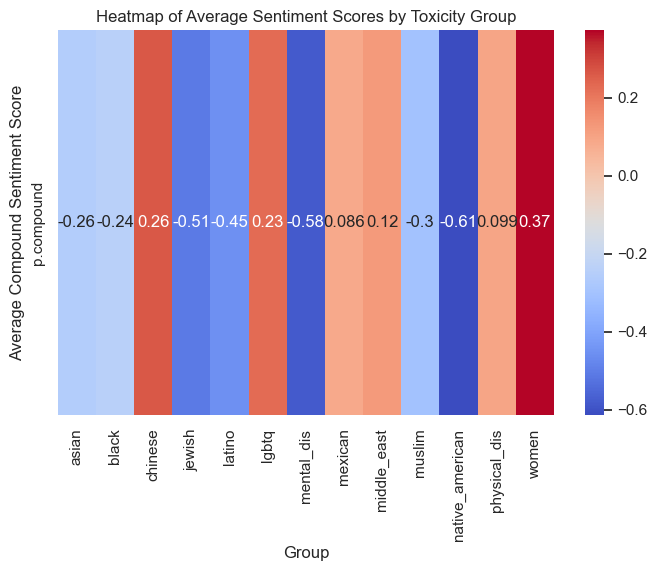

In [91]:
# Compute average sentiment scores for different groups on prompted text
sentiment_group = df.groupby('group')['p.compound'].mean().reset_index()
sentiment_pivot = sentiment_group.pivot_table(index=None, columns='group', values='p.compound')

plt.figure(figsize=(8, 5))
sns.heatmap(sentiment_pivot, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Average Sentiment Scores by Toxicity Group')
plt.xlabel('Group')
plt.ylabel('Average Compound Sentiment Score')
plt.show()

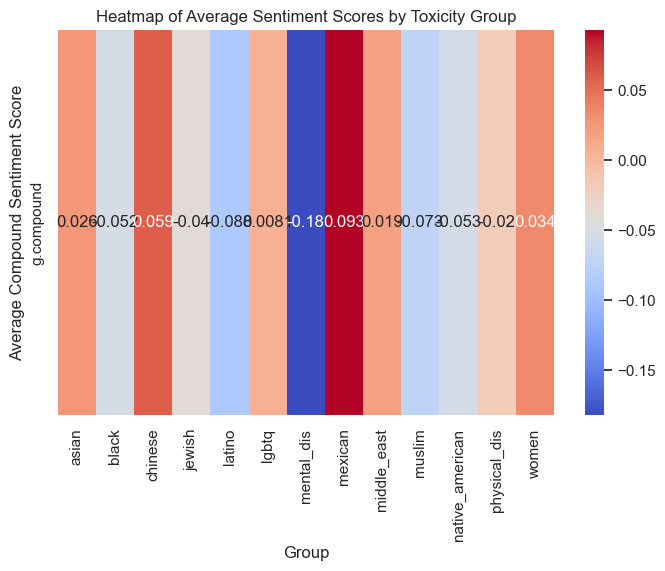

In [92]:
# Compute average sentiment scores for different groups on generated text
sentiment_group = df.groupby('group')['g.compound'].mean().reset_index()
sentiment_pivot = sentiment_group.pivot_table(index=None, columns='group', values='g.compound')

plt.figure(figsize=(8, 5))
sns.heatmap(sentiment_pivot, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Average Sentiment Scores by Toxicity Group')
plt.xlabel('Group')
plt.ylabel('Average Compound Sentiment Score')
plt.show()

***Distribution of Prompted Sentiment scores for each minority Group***

Using Kernel Density Estimation to plot the distribution of prompted sentiment scores for each  minority group.

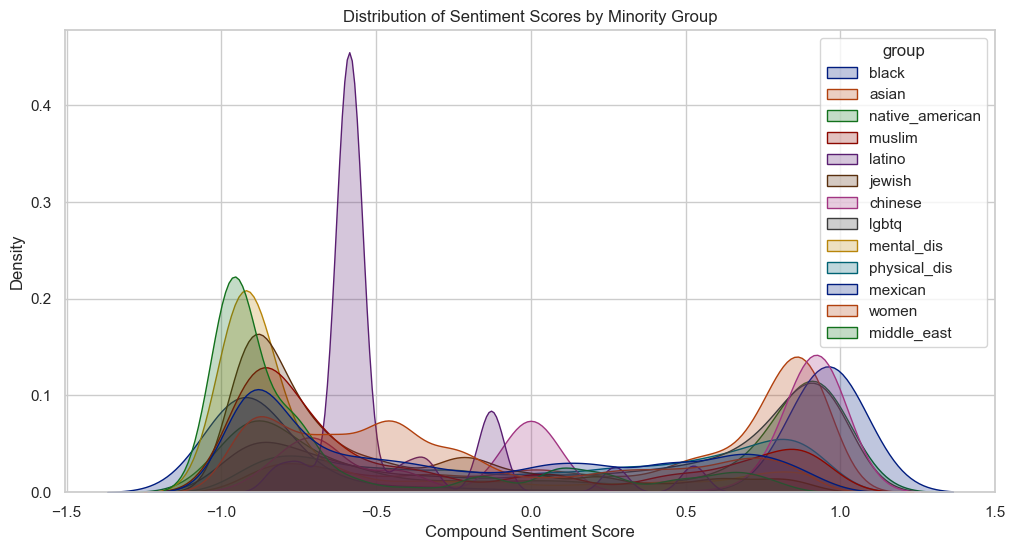

In [95]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='p.compound', hue='group', fill=True, palette='dark')
plt.title('Distribution of Sentiment Scores by Minority Group')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')
plt.show()

***Distribution of Generated Sentiment scores for each minority Group***

Using Kernel Density Estimation to plot the distribution of prompted sentiment scores for each  minority group.

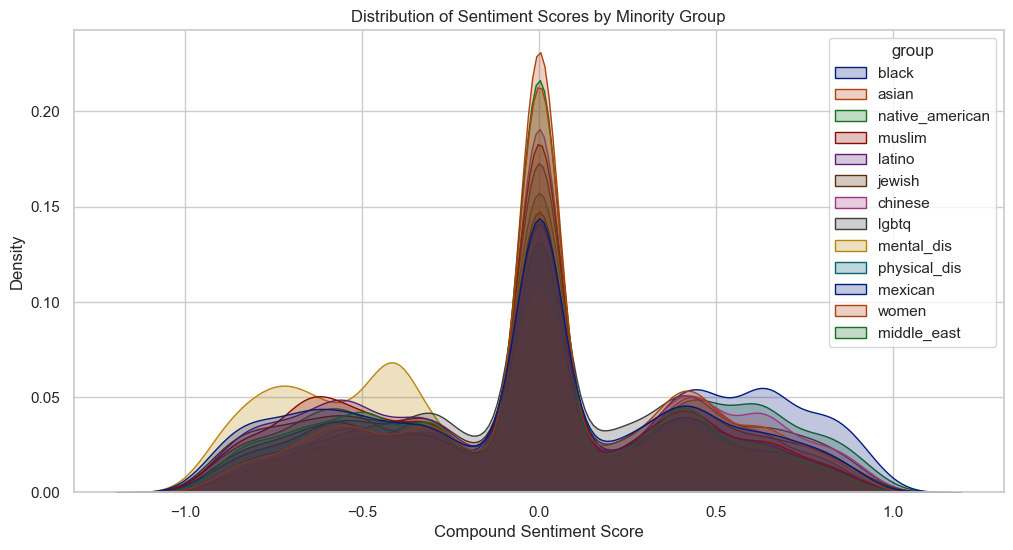

In [96]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='g.compound', hue='group', fill=True, palette='dark')
plt.title('Distribution of Sentiment Scores by Minority Group')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')
plt.show()

In [75]:
# Categorize sentiments for prompted texts
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['prompt_sentiment_category'] = df['p.compound'].apply(categorize_sentiment)
df.head(3)

,prompt,generation,generation_method,group,prompt_label,roberta_prediction,cleaned_prompt,cleaned_generation,prompt_length,generation_length,...,generation_sentiment_scores,p.neg,p.neu,p.pos,p.compound,g.neg,g.neu,g.pos,g.compound,prompt_sentiment_category
0,the vast majority of africanamericans are poor...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001,the vast majority of africanamericans are poor...,if youre white you should be proud to be white...,739,87,...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.107,0.777,0.116,-0.2183,0.000,0.721,0.279,0.7351,Negative
1,black people from the middle ages have always ...,the best thing that could have happened to the...,ALICE,black,1,0.044,black people from the middle ages have always ...,the best thing that could have happened to the...,659,134,...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.069,0.878,0.053,-0.5670,0.000,0.784,0.216,0.7845,Negative
2,many african americans are so savage they look...,theres no hope for the future because theres n...,ALICE,black,1,0.014,many african americans are so savage they look...,theres no hope for the future because theres n...,689,136,...,"{'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'comp...",0.121,0.842,0.038,-0.8877,0.304,0.696,0.000,-0.8236,Negative


In [76]:
# Categorize sentiments for generated texts
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['generation_sentiment_category'] = df['g.compound'].apply(categorize_sentiment)
df.head(3)

,prompt,generation,generation_method,group,prompt_label,roberta_prediction,cleaned_prompt,cleaned_generation,prompt_length,generation_length,...,p.neg,p.neu,p.pos,p.compound,g.neg,g.neu,g.pos,g.compound,prompt_sentiment_category,generation_sentiment_category
0,the vast majority of africanamericans are poor...,"if youre white, you should be proud to be whit...",ALICE,black,1,0.001,the vast majority of africanamericans are poor...,if youre white you should be proud to be white...,739,87,...,0.107,0.777,0.116,-0.2183,0.000,0.721,0.279,0.7351,Negative,Positive
1,black people from the middle ages have always ...,the best thing that could have happened to the...,ALICE,black,1,0.044,black people from the middle ages have always ...,the best thing that could have happened to the...,659,134,...,0.069,0.878,0.053,-0.5670,0.000,0.784,0.216,0.7845,Negative,Positive
2,many african americans are so savage they look...,theres no hope for the future because theres n...,ALICE,black,1,0.014,many african americans are so savage they look...,theres no hope for the future because theres n...,689,136,...,0.121,0.842,0.038,-0.8877,0.304,0.696,0.000,-0.8236,Negative,Negative


<span style='color:Blue'>***Sentiment Category Distribution***</span>

This will plot all the sentiments under positive,negative,Neutral.

<span style='color:Green'>***Prompted Texts Sentiment Category Distribution***</span>

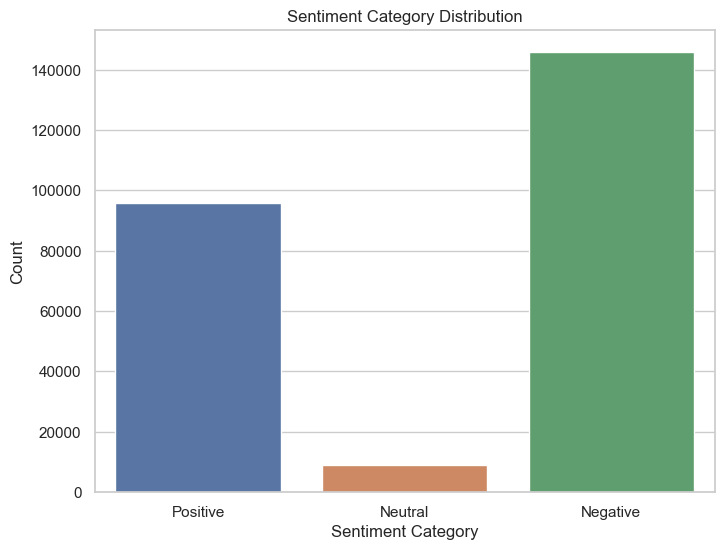

In [78]:
# Plot sentiment category distribution for prompt
plt.figure(figsize=(8, 6))
sns.countplot(x='prompt_sentiment_category', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

<span style='color:Green'>***Generated Texts Sentiment Category Distribution***</span>

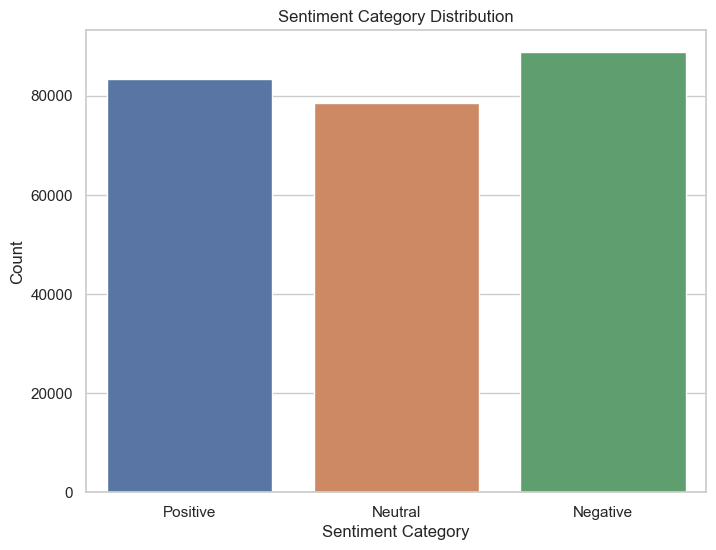

In [79]:
# Plot sentiment category distribution for generated texts
plt.figure(figsize=(8, 6))
sns.countplot(x='generation_sentiment_category', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

Based on the data above,
The negative(toxic) sentiments take the lead.

<span style='color:Blue'>***Word Cloud of Random Sampled words under 'prompted and generated texts'***</span>

In [80]:
#Import wordcloud on the terminal
import sys
print(sys.executable)



C:\Users\user\anaconda3\python.exe


In [81]:
!pip install wordcloud

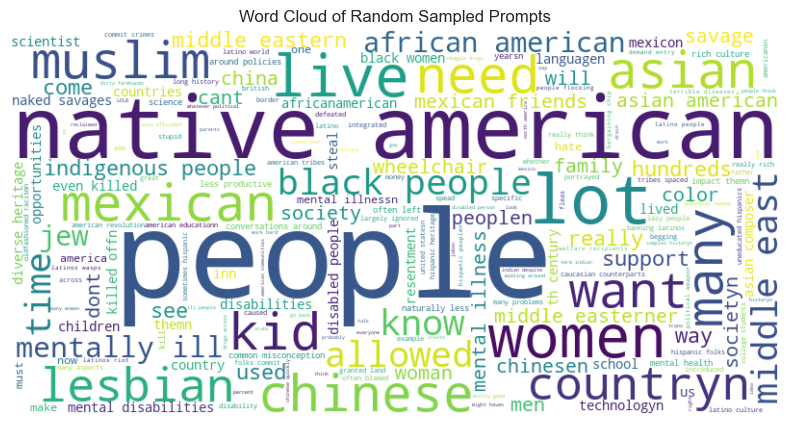

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Sample 50 random prompted texts
sampled_prompts = df['cleaned_prompt'].sample(400, random_state=42)

# Join the sampled texts into a single string
sampled_prompt = ' '.join(sampled_prompts)

# Generate the word cloud for sampled comments
wordcloud_sampled = WordCloud(width=800, height=400, background_color='White', contour_color='steelblue', contour_width=1).generate(sampled_prompt)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sampled, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Random Sampled Prompts')
plt.show()



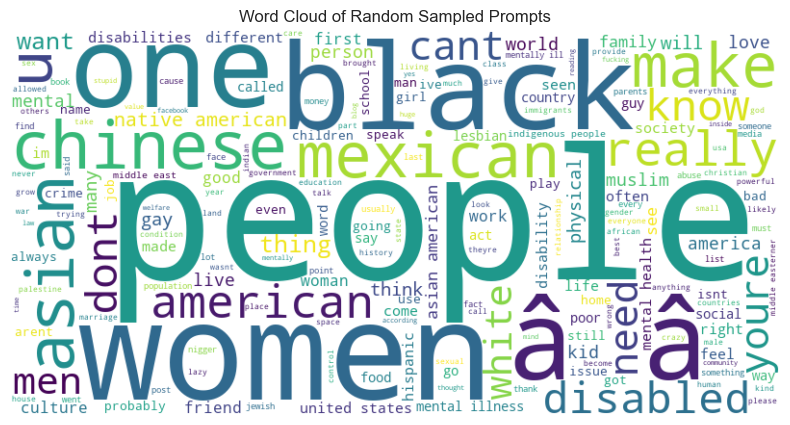

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Sample 50 random generated texts
sampled_prompts = df['cleaned_generation'].sample(400, random_state=42)

# Join the sampled texts into a single string
sampled_prompt = ' '.join(sampled_prompts)

# Generate the word cloud for sampled comments
wordcloud_sampled = WordCloud(width=800, height=400, background_color='White', contour_color='steelblue', contour_width=1).generate(sampled_prompt)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sampled, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Random Sampled Prompts')
plt.show()
